# Create CartPole environment

In [1]:
# Import the gym Library
import gym

# Create the environment using gym.make(env_name)
env = gym.make('CartPole-v1')

"""
Analyze the action space of cart pole using the property action_space
"""
print("Action Space:", env.action_space)

"""
Analyze the observation space of cartpole using the property observation_space
"""
print("Observation Space:", env.observation_space)

Action Space: Discrete(2)
Observation Space: Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


The two discrete actions are Go Left (0) and Go Right (1).<br> The (4,) means that it is a 4 dimensional box, subset of $\mathbb{R}^n$.<br> The forms of each interval in the Box space can be one of $[a,b],(-\infty,b],[a,+\infty),(-\infty,+\infty)$.
> **Note:**<br> The square brackets indicate bounded values, and the parenthsis indicate unbounded values.
## Inspect the observation space

In [2]:
# Analyze the bounds of the observation space
print("Lower bound of the Observation Space:", env.observation_space.low)
print("Upper bound of the Observation Space:", env.observation_space.high)

Lower bound of the Observation Space: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
Upper bound of the Observation Space: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


From left to right, these represent the cart position, velocity, pole angle in rads, and angular velocity.

## GYM SPACES
Create a simple space and sample it:

In [9]:
# Type hinting
from typing import Tuple
import gym 

# Import the spaces module
from gym import spaces

# Create a discrete space composed by N-elements (5)
n: int = 5
    
discrete_space = spaces.Discrete(n=n)

# Sample from the space using .sample method
print("Discrete Space Sample:", discrete_space.sample())

"""
Create a Box space with a shape of (4, 4)
Upper and lower Bound are 0 and 1
"""

box_shape: Tuple[int, int] = (4, 4)
box_space = spaces.Box(low=0, high=1, shape=box_shape)

# Sample from the space using .sample method
print("Box Space Sample:", box_space.sample())

Discrete Space Sample: 4
Box Space Sample: [[0.9152002  0.58414215 0.14331636 0.69191855]
 [0.7673505  0.5788462  0.12807053 0.8396702 ]
 [0.5162505  0.00189281 0.64061785 0.98596126]
 [0.675657   0.6082858  0.6773297  0.7513691 ]]


This is a random sample of the $4^{th}$ element from the discrete space composed of 5 elements (0 to 4). The result is a 4x4 matrix bounded between 0 and 1.

The sample can be seeded for reproducibility.

In [10]:
# Seed spaces to obtain reproducible samples
discrete_space.seed(0)
box_space.seed(0)

# Sample from the space using .sample method
print("Discrete Space (seed=0) Sample:", discrete_space.sample())

# Sample from the space using .sample method
print("Box Space (seed=0) Sample:", box_space.sample())

Discrete Space (seed=0) Sample: 0
Box Space (seed=0) Sample: [[0.05436005 0.9653909  0.63269097 0.29001734]
 [0.10248426 0.67307633 0.39257675 0.66984606]
 [0.05983897 0.52698725 0.04029069 0.9779441 ]
 [0.46293673 0.6296479  0.9470484  0.6992778 ]]


### Creating A Space For Image Observations
Create a space representing RGB images with dimensions equal to 256 x 256.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np # used for the dtype of the space

"""
since the Space is RGB images with shape 256x256 the final shape is (256, 256, 3)
"""
shape = (256, 256, 3)

# If we consider uint8 images the bounds are 0-255
low = 0
high = 255

# Space type: unsigned int
dtype = np.uint8

# Create the space
space = spaces.Box(low=low, high=high, shape=shape, dtype=dtype)

# Print space representation
print("Space", space) # prints WxHxC

# Sample from the space
sample = space.sample()
print("Space Sample", sample)

Space Box(0, 255, (256, 256, 3), uint8)
Space Sample [[[188 110 234]
  [107 103  88]
  [ 58 228  90]
  ...
  [183 178 240]
  [119 210  49]
  [ 83 163  58]]

 [[  5 203  55]
  [ 83 138 193]
  [144  10 150]
  ...
  [194  14 202]
  [178  90  56]
  [100 215 165]]

 [[238 169 214]
  [167 254   2]
  [191  62   0]
  ...
  [210 195  57]
  [248  32  63]
  [107 145 155]]

 ...

 [[ 92 210 188]
  [254  78  16]
  [ 34 220 159]
  ...
  [134  27  63]
  [ 58 219 172]
  [228  17 204]]

 [[ 28 160 130]
  [194 247  60]
  [ 36 212 178]
  ...
  [102 226 205]
  [175 228 114]
  [126 216   8]]

 [[141 247 206]
  [ 82 199 216]
  [242  18 248]
  ...
  [ 29  83 188]
  [ 79 230 118]
  [177 193 178]]]


#### Visualize the retruned sample

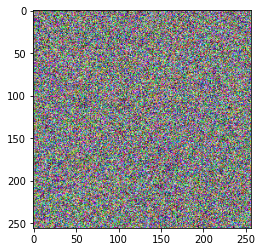

In [15]:
plt.imshow(sample)

### Add temporal component
Allow the agent to see thae last **n** frames. This leads to a state representation of 4 dimensions. TxWxHxC is the result.

In [17]:
# We want a space representint the last n=4 frames
n_frames = 4 # number of frames
width = 256 # image width
height = 256 # image height
channels = 3 # number of channels (RGB)
shape_temporal = (n_frames, width, height, channels)
# create a new instance of space
space_temporal = spaces.Box(low=low, high=high, shape=shape_temporal, dtype=dtype)

print("Space with temporal component", space_temporal)

Space with temporal component Box(0, 255, (4, 256, 256, 3), uint8)
